# 项目：帕默群岛企鹅数据导入、清理、可视化及分析

## 数据简介

原始数据`Penguins.csv`包括334个收集自南极洲帕尔默群岛的3个岛屿上的企鹅样本，以及企鹅相关属性数据，包括种类名、所在岛、嘴峰长度、嘴峰深度、鳍长度、体重、性别。

`Penguins.csv`每列的含义如下：
- species：企鹅的种类
- island：企鹅所在岛
- culmen_length_mm：企鹅嘴峰的长度（单位为毫米）
- culmen_depth_mm：企鹅嘴峰的深度（单位为毫米）
- flipper_length_mm：企鹅鳍的长度（单位为毫米）
- body_mass_g：企鹅体重（单位为克）
- sex：企鹅性别

## 分析目标

此数据分析报告的目的是对帕默群岛上企鹅样本进行整理分析，从而探索和分析种类、性别、所在岛屿等因素，与企鹅的身体属性，包括体重、嘴峰长度和深度、鳍的长度之间的关系。

## 读取数据

In [1]:
#导入数据分析所需要的库
import numpy as np
import pandas as pd
#读取数据并显示前五行数据
data = pd.read_csv("Penguins.csv")
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### 小结：从前5行数据来看，数据表中的每个变量为一列，每个观察值为一行，每种类型的观察单位为一个表格

## 检查缺失数据：提取、分析、处理

In [2]:
#对数据内容进行大致了解
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
data.query("culmen_length_mm.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


发现culmen_depth_mm、flipper_length_mm、body_mass_g 这三列的缺失值也是在3、339行中

In [4]:
#观察值不再具有价值，可以删除
data.drop(3, inplace=True)
data.drop(339, inplace=True)

In [5]:
data.query("sex.isna()")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


缺失性别变量的观察值但仍具备其它数据，可以保留进行其他变量的分析

## 检查重复数据

In [6]:
data.duplicated().sum()

np.int64(0)

无重复观察值

## 检查不一致数据

In [7]:
data["species"].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [8]:
data["island"].value_counts()

island
Biscoe       167
Dream        124
Torgersen     51
Name: count, dtype: int64

In [9]:
data["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

species和island列里不存在不一致数据，但sex列里存在一个英文句号值，无效数据应将其替换为NaN空值

In [10]:
data['sex'] = data['sex'].replace(".", np.nan)
data["sex"].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

## 检查异常数据

In [11]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


根据统计数据未发现异常数据

## 可视化处理

In [12]:
# 导入绘图数据库
import matplotlib.pyplot as plt
import seaborn as sns
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

### 研究企鹅种类分布

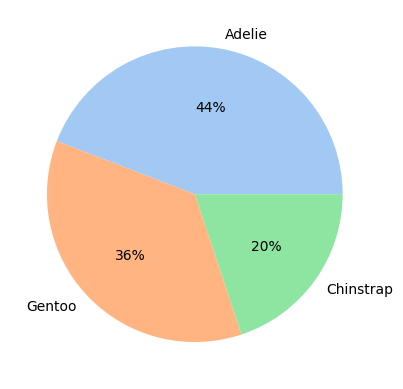

In [13]:
species_count = data["species"].value_counts()
plt.pie(species_count, autopct='%.0f%%', labels=species_count.index)
plt.show()

样本中Adelie这个种类的企鹅占比最大，Gentoo种类的占比次之，Chinstrap的占比最小

### 研究企鹅所属岛屿

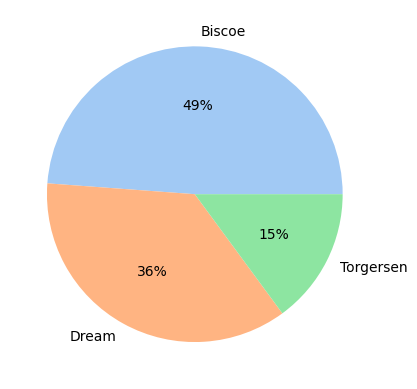

In [14]:
island_count = data["island"].value_counts()
plt.pie(island_count, autopct='%.0f%%', labels=island_count.index)
plt.show()

样本中一半左右的企鹅样本都来自Biscoe岛屿，占比最大，其次是Dream岛屿，来自Torgersen岛屿的样本最少

### 研究不同岛上的企鹅种类数量

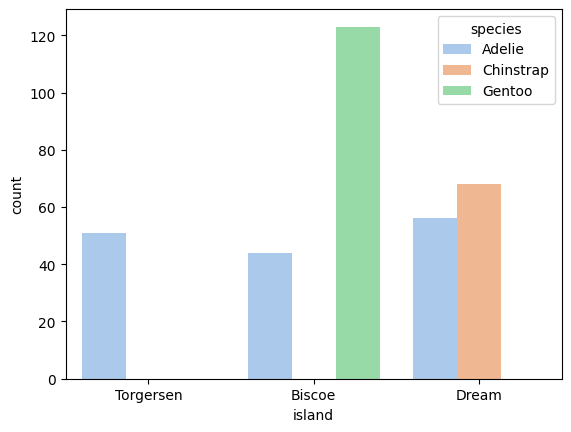

In [17]:
sns.countplot(data, x="island", hue="species")
plt.show()

### 企鹅性别比例分布

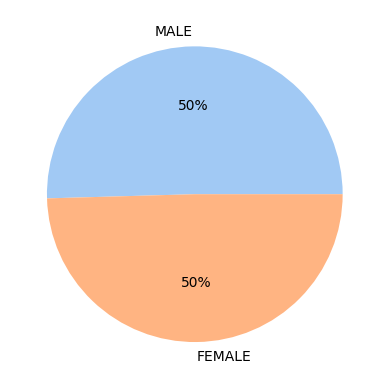

In [16]:
sex_count = data['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%.0f%%')
plt.show()

### 不同岛屿上的企鹅性别数量

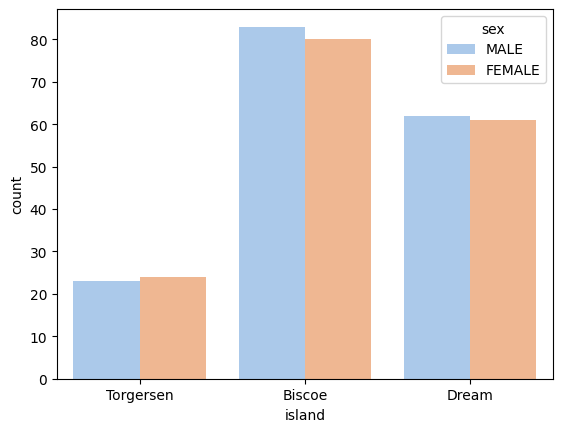

In [18]:
sns.countplot(data, x='island', hue='sex')
plt.show()

总体样本及各岛上的企鹅的性别占比均持平

### 研究企鹅身体属性（体重、嘴峰长度和深度、鳍的长度）之间的关系

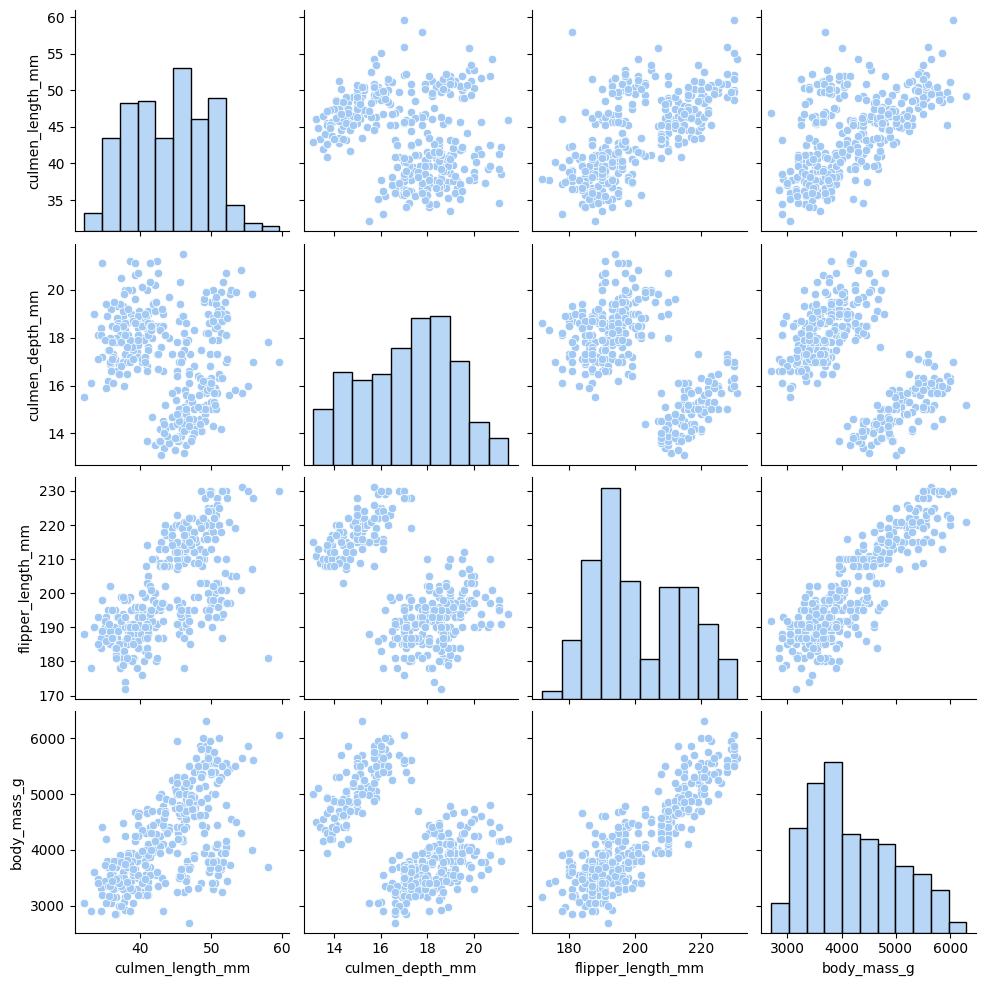

In [19]:
sns.pairplot(data)
plt.show()

从直方图可以看出企鹅样本的嘴峰长度、嘴峰深度、鳍长度、体重的分布不是正态分布，且从散点图可以看出存在多个集群，应从企鹅种类、性别、岛屿方面进一步分析

### 依据企鹅种类研究企鹅身体属性之间的关系

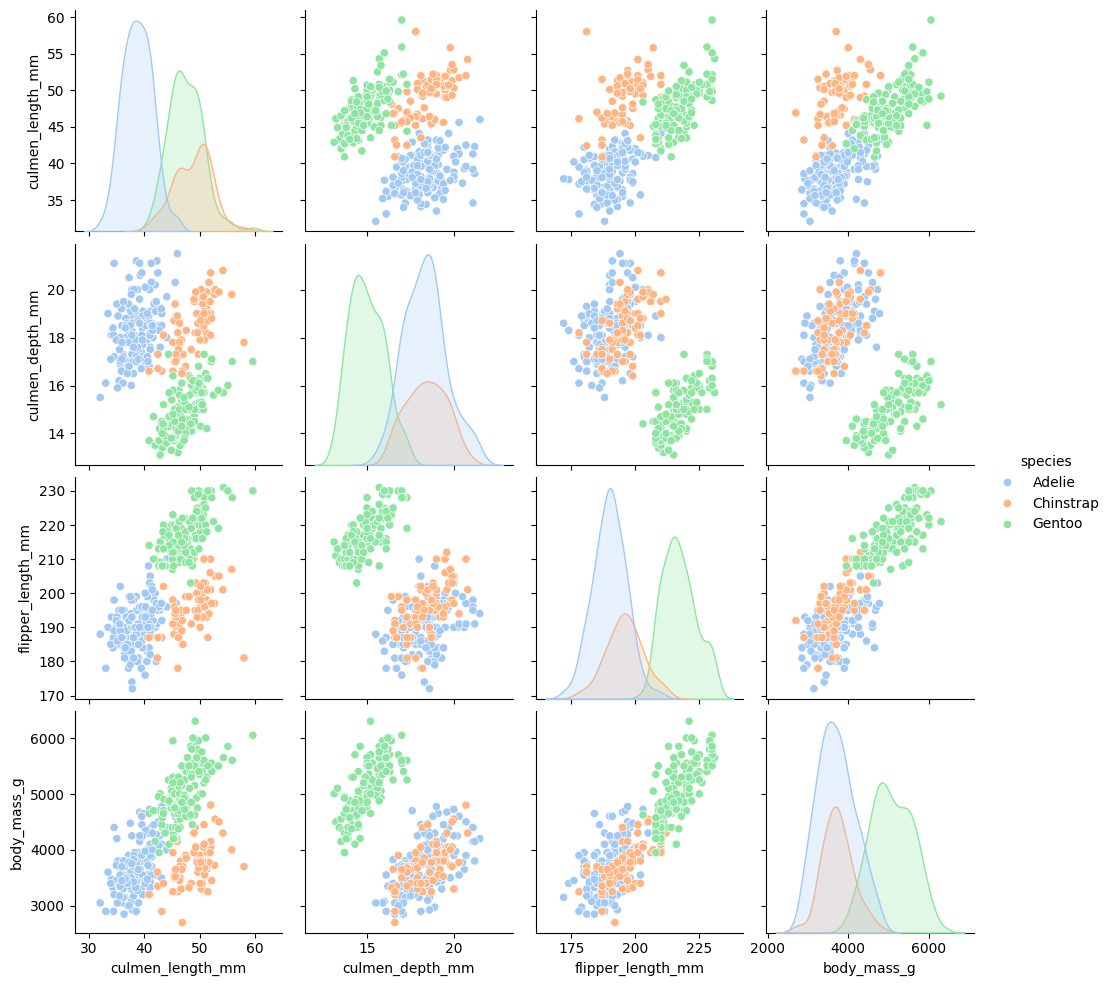

In [21]:
sns.pairplot(data, hue='species')
plt.show()

依据企鹅种类分类后，由密度图可以发现：
- Chinstrap和Gentoo的嘴峰长度范围较为接近，而Adelie的嘴峰长度更短。
- Adelie和Chinstrap的嘴峰深度范围较为接近，而Gentoo的嘴峰深度更短。
- Adelie的鳍长度最短，Chinstrap中等，而Gentoo的鳍长度嘴长。
- Adelie和Chinstrap的体重范围较为接近，而Gentoo的体重更大。

由散点图可以发现：
- 集群区分更为明显，可以初步判定身体属性之间的关系与种类相关，即同一种企鹅在四个变量的关系上存在相似性。

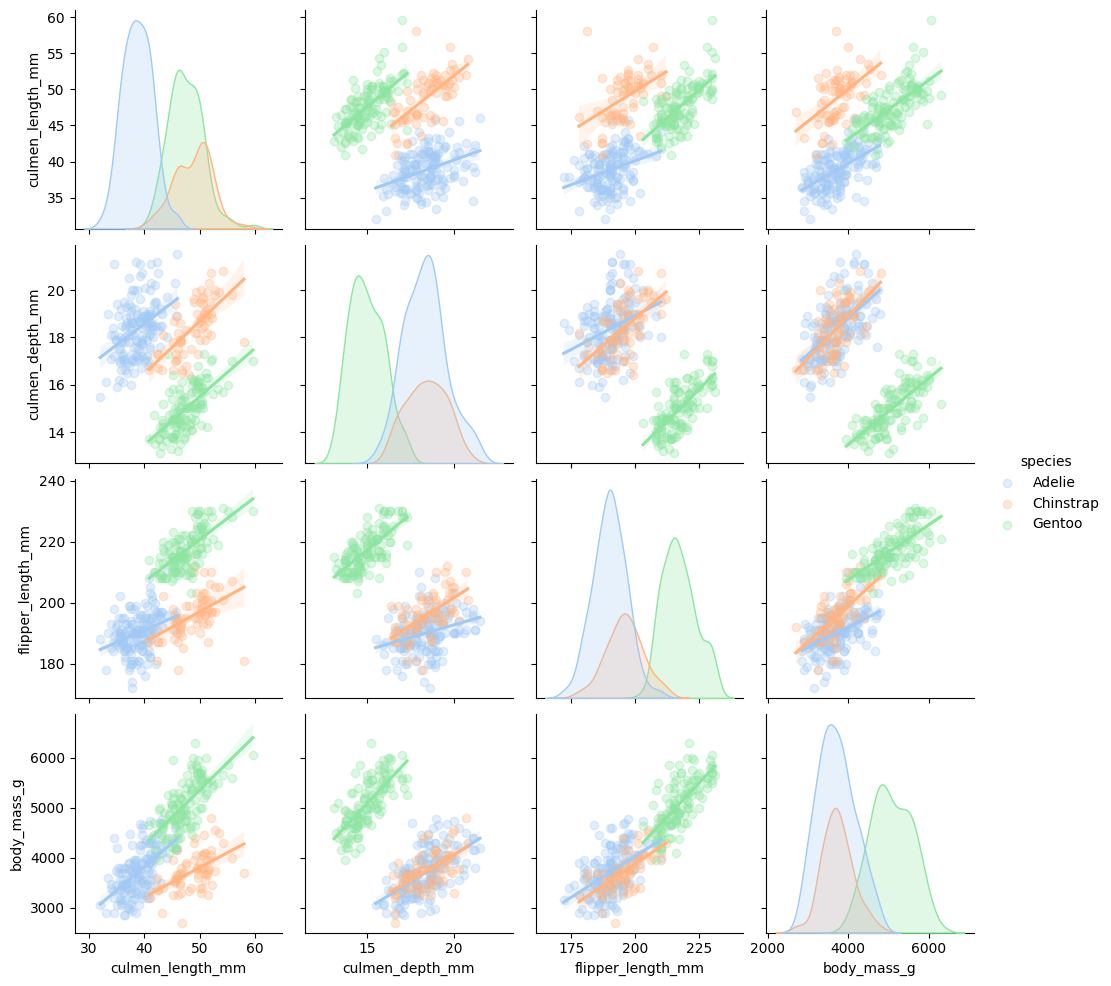

In [23]:
#增加趋势线以进一步分析
sns.pairplot(data, hue='species', kind='reg', plot_kws={'scatter_kws': {'alpha': 0.3}})
plt.show()

发现各变量之间均呈现正相关

### 依据企鹅所在岛屿研究企鹅身体属性之间的关系

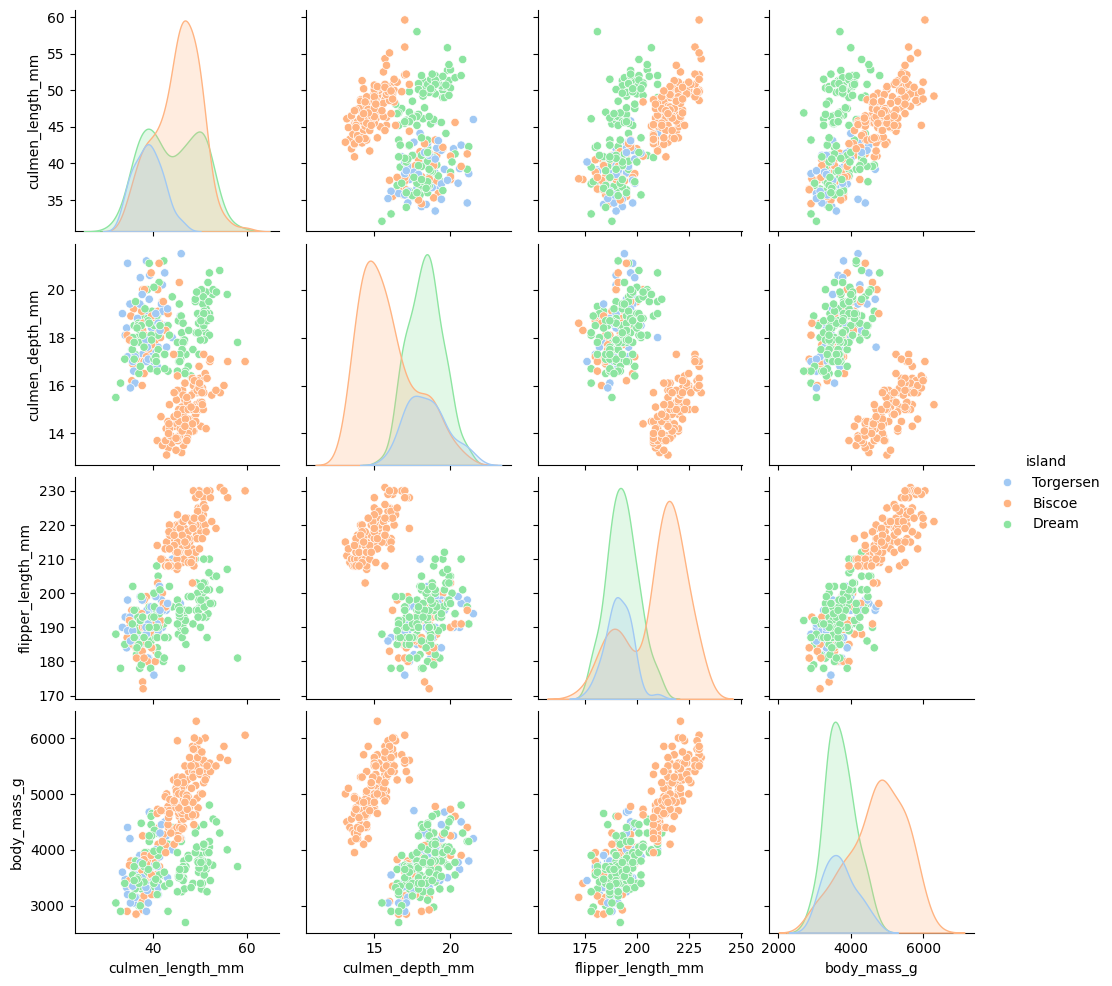

In [26]:
sns.pairplot(data, hue='island')
plt.show()

### 依据企鹅性别研究企鹅身体属性之间的关系

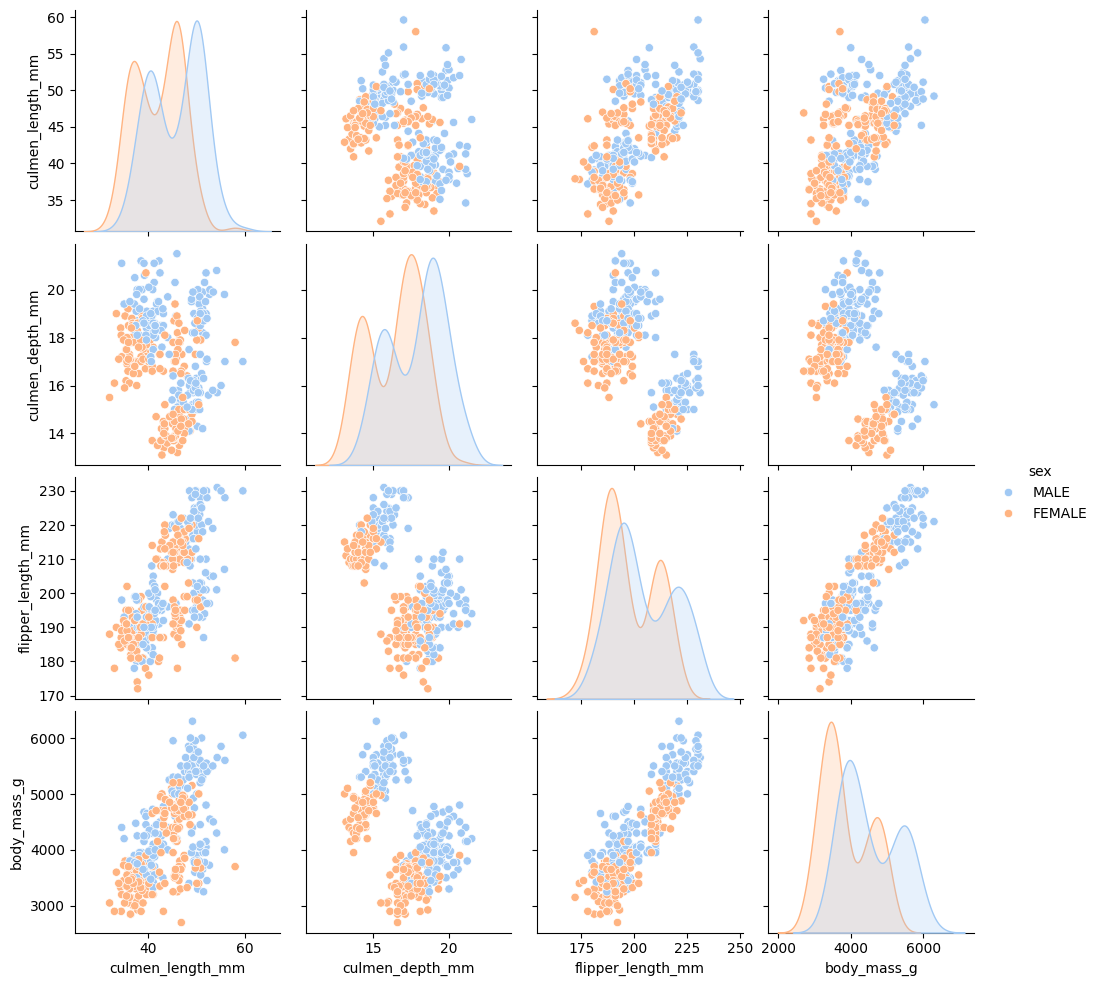

In [28]:
sns.pairplot(cleaned_data, hue='sex')
plt.show()

样本中雄性企鹅在各项身体属性均大于雌性企鹅